Initial Dataset Shape: (187531, 21)

Missing Values per Column:
 Description            3023
Price (in rupees)     17665
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


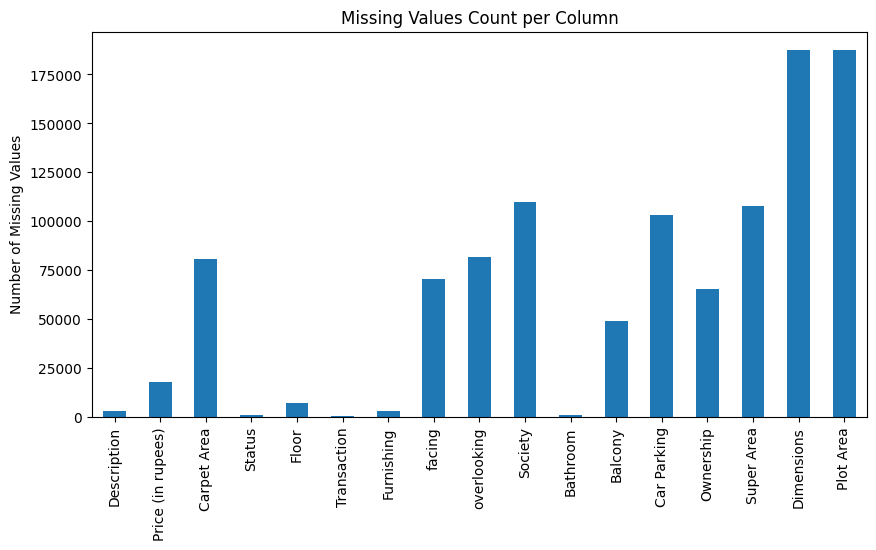


After Dropping High-Missing Columns Shape: (187531, 19)


/tmp/ipython-input-2056335135.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2056335135.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Missing Values After Cleaning:
 0

Final Dataset Shape: (187531, 19)

Cleaned dataset saved as 'house_prices_cleaned.csv'


In [3]:
# ==========================================
# Task 2: Data Cleaning & Missing Value Handling
# Dataset: House Prices
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# 1. Load Dataset
# -----------------------
df = pd.read_csv("house_prices.csv", engine="python")

print("Initial Dataset Shape:", df.shape)

# -----------------------
# 2. Identify Missing Values
# -----------------------
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values[missing_values > 0])

# -----------------------
# 3. Visualize Missing Data
# -----------------------
missing_values[missing_values > 0].plot(kind="bar", figsize=(10, 5))
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.show()

# -----------------------
# 4. Drop Columns with High Missing Values (>40%)
# -----------------------
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

print("\nAfter Dropping High-Missing Columns Shape:", df.shape)

# -----------------------
# 5. Separate Numerical & Categorical Columns
# -----------------------
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# -----------------------
# 6. Impute Numerical Columns (Median)
# -----------------------
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# -----------------------
# 7. Impute Categorical Columns (Mode)
# -----------------------
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# -----------------------
# 8. Validate After Cleaning
# -----------------------
print("\nMissing Values After Cleaning:\n", df.isnull().sum().sum())

# -----------------------
# 9. Compare Before vs After
# -----------------------
print("\nFinal Dataset Shape:", df.shape)

# -----------------------
# 10. Save Cleaned Dataset
# -----------------------
df.to_csv("house_prices_cleaned.csv", index=False)

print("\nCleaned dataset saved as 'house_prices_cleaned.csv'")
